#### Задание 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [1371]:
import numpy as np
import matplotlib.pyplot as plt

In [1372]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [1373]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [1374]:
# сделаем стандартизацию 
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [1375]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [1376]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

lambda = 0.001, weights = [56.47176412  6.29560868 -0.336219    6.55563238]
lambda = 0.01, weights = [56.21890547  6.23068071 -0.16465343  6.42094593]
lambda = 0.1, weights = [53.80952381  5.73058911  0.98368308  5.5160994 ]
lambda = 1, weights = [37.66666667  4.01145689  2.67324854  3.68757438]
lambda = 1.2, weights = [35.3125      3.82489516  2.68143446  3.53699411]
lambda = 1.5, weights = [32.28571429  3.58815268  2.65536153  3.34508297]


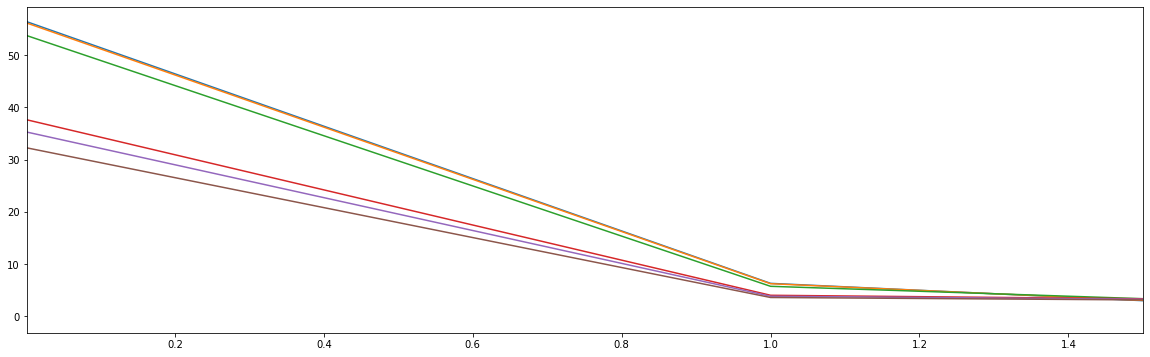

In [1377]:
lambda_list = [1e-3, 1e-2,  1e-1, 1, 1.2, 1.5]    
plt.figure(figsize = (20, 6))
for i in lambda_list:
    w = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=i)
    print(f'lambda = {i}, weights = {w}')
    plt.plot(w)
    plt.xlim(lambda_list[0], lambda_list[-1])



Вывод: чем больше лямбда, тем меньше веса, т к увеличивается штраф за высокие значения

#### Задание 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [1378]:
#Производная фукнции модуля =  x/|x|

In [1379]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W/abs(W) # градиент регуляризации l1
        
        W -= eta * dQ + dReg
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [1380]:
gradient_descent_reg_l1(X_st, y, iterations=4000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.03878143  2.87209842  3.1376295   1.47962966], error 3490.2670075957903
Iter: 400, weights: [56.4995      6.3008113  -0.34918222  6.56610152], error 24.904628172744616
Iter: 800, weights: [56.4995      6.30107072 -0.3504346   6.56713523], error 24.904625286366095
Iter: 1200, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687654
Iter: 1600, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687466
Iter: 2000, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687462
Iter: 2400, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687462
Iter: 2800, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687455
Iter: 3200, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687462
Iter: 3600, weights: [56.4995      6.30107078 -0.35043493  6.5671355 ], error 24.904625285687462
Final MSE: 24.904625285687455


array([56.4995    ,  6.30107078, -0.35043493,  6.5671355 ])

In [1381]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-5)

Iter: 0, weights: [ 1.19746515 -0.32439229  2.18947996 -0.51584517], error 3331.0720074238334
Iter: 500, weights: [56.49723129  5.7795814   1.71443833  4.95175606], error 25.644154905200416
Iter: 1000, weights: [56.49949991  6.1456274   0.37915186  5.96865979], error 24.99986621839274
Iter: 1500, weights: [56.4995      6.24725111 -0.09046209  6.35252605], error 24.917099510449493
Iter: 2000, weights: [56.4995      6.28168865 -0.25685667  6.48989511], error 24.906363411504437
Iter: 2500, weights: [56.4995      6.29409382 -0.31675206  6.5393338 ], error 24.904894382812063
Iter: 3000, weights: [56.4995      6.29855946 -0.33831105  6.55712853], error 24.904675954051786
Iter: 3500, weights: [56.4995      6.30016685 -0.34607104  6.56353358], error 24.904637538942175
Iter: 4000, weights: [56.4995      6.30074542 -0.34886418  6.56583902], error 24.90462892081715
Iter: 4500, weights: [56.4995      6.30095367 -0.34986955  6.56666884], error 24.90462649367209
Final MSE: 24.904625707477287


array([56.4995    ,  6.30102854, -0.35023101,  6.56696719])

#### Задание 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

По условию задачи получается, что нужно достичь одновременно следующих показателей в данных:  
среднее = 0,   
среднеквадратическое отклонение =0  
минимум = 0  
максимум = 1  

Рассуждая, можно предположить, что нормируя данные, они становятся в пределах от 0 до 1 , что практически исключает получение среднего равного 1 (за исключением случая, когда все значения будут равны 1), аналогично со среднеквадратическим отклонением.

Попробуем на практике создать функцию, объединяющую эти два способа масштабирования

In [1382]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [1383]:
X = X.astype('float')

In [1384]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [1385]:
def test_norm_with_std(X):
    # попробуем совместить выражение в разных порядках
    #return ((X - X.min()) / (X.max() - X.min()) - X.mean())/X.std()
    return ((X - X.mean())/(X.std() - X.min()))/((X.max() - X.min()))

In [1386]:
X_for_test = X.copy()

X_for_test[:, 1] = test_norm_with_std(X_for_test[:, 1])
X_for_test[:, 2] = test_norm_with_std(X_for_test[:, 2])
X_for_test[:, 3] = test_norm_with_std(X_for_test[:, 3])

In [1387]:
means = np.mean(X_for_test[:, 1:], axis=0)
stds = np.std(X_for_test[:, 1:], axis = 0)
maxs = np.max(X_for_test[:, 1:], axis = 0)
mins = np.min(X_for_test[:, 1:], axis = 0)
means, stds, maxs, mins

(array([ 4.16333634e-18,  1.62630326e-19, -1.66533454e-16]),
 array([0.1       , 0.0089646 , 1.78336534]),
 array([0.24748737, 0.01894983, 1.59835574]),
 array([-0.10606602, -0.00970601, -2.96837495]))

Как видно, значения не получились требуемыми (среднее = 0, среднеквадратическое отклонение =0, минимум = 0, максимум = 1)

**Попробуем теперь сделать нормализацию и стандартизацию , а после - наоборот**

In [1388]:
#данные в разных диапазонах, сделаем нормализацию
def normalization(X):
    return (X - X.min()) / (X.max() - X.min())

In [1389]:
X_norm = X.copy()

X_norm[:, 1] = normalization(X_norm[:, 1])
X_norm[:, 2] = normalization(X_norm[:, 2])
X_norm[:, 3] = normalization(X_norm[:, 3])

In [1390]:
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [1391]:
# найдем среднее значение и среднее квадратическое отклонение
X_norm[:, 1].mean(), X_norm[:, 1].std()

(0.30000000000000004, 0.282842712474619)

In [1392]:
# теперь попробуем произвести стандартизацию
# создадим копию датасета без 1 столбца, т к он не нуждается в стандартизации
X_std = X_norm[:, 1:4].copy() 

means = np.mean(X_std, axis = 0)
stds = np.std(X_std, axis = 0)

In [1393]:
for i in range(X_std.shape[0]):
    for j in range(X_std.shape[1]):
        X_std[i][j] = (X_std[i][j] - means[j])/stds[j]
X_std

array([[-7.07106781e-01, -9.79589689e-01, -8.96258160e-01],
       [-7.07106781e-01, -5.67130873e-01, -8.96258160e-01],
       [-3.53553391e-01, -4.64016169e-01,  3.84110640e-01],
       [ 7.07106781e-01, -7.73360281e-01, -8.96258160e-01],
       [-1.96261557e-16,  9.79589689e-01,  3.84110640e-01],
       [-1.06066017e+00, -3.60901465e-01, -8.96258160e-01],
       [ 7.07106781e-01,  1.08270439e+00,  1.66447944e+00],
       [ 2.47487373e+00,  2.11385144e+00,  1.66447944e+00],
       [-7.07106781e-01, -1.08270439e+00, -8.96258160e-01],
       [-3.53553391e-01,  5.15573521e-02,  3.84110640e-01]])

In [1394]:
means_std = np.mean(X_std, axis = 0)
stds_std = np.std(X_std, axis = 0)
means_std, stds_std

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

Можно сделать вывод, что теоретически после нормализации можно сделать стандартизацию, в результате получим среднее=0 и стандартное отклонение = 1. Однако это не имеет смысла, т. к. цель обоих методов - привести данные к одной размерности, что успешно получилось сделать с помощью нормализации
  
**Попробуем пойти в обратную сторону**. - сначала стандартизация, потом нормализация

In [1395]:
X_std1 = X[:, 1:4].copy()
means = np.mean(X_std1, axis = 0)
stds = np.std(X_std1, axis = 0)


In [1396]:
X_std1.shape

(10, 3)

In [1397]:
for i in range(X_std1.shape[0]):
    for j in range(X_std1.shape[1]):
        X_std1[i][j] = (X_std1[i][j] - means[j])/stds[j]
X_std1

array([[-0.70710678, -0.97958969, -0.89625816],
       [-0.70710678, -0.56713087, -0.89625816],
       [-0.35355339, -0.46401617,  0.38411064],
       [ 0.70710678, -0.77336028, -0.89625816],
       [ 0.        ,  0.97958969,  0.38411064],
       [-1.06066017, -0.36090146, -0.89625816],
       [ 0.70710678,  1.08270439,  1.66447944],
       [ 2.47487373,  2.11385144,  1.66447944],
       [-0.70710678, -1.08270439, -0.89625816],
       [-0.35355339,  0.05155735,  0.38411064]])

In [1398]:
means_std = np.mean(X_std1, axis = 0)
stds_std = np.std(X_std1, axis = 0)

means_std, stds_std

(array([2.22044605e-17, 2.49800181e-17, 8.32667268e-17]), array([1., 1., 1.]))

In [1399]:
X_std.shape[1]

3

In [1400]:
# Проведем нормализацию
X_norm1 = X_std1.copy()
X_norm1[:, 0] = normalization(X_norm1[:, 0])
X_norm1[:, 1] = normalization(X_norm1[:, 1])
X_norm1[:, 2] = normalization(X_norm1[:, 2])

In [1401]:
max_norm = np.max(X_norm1, axis = 0)
min_norm = np.min(X_norm1, axis = 0)

max_norm, min_norm

(array([1., 1., 1.]), array([0., 0., 0.]))

Вывод аналогичен. Произвести стандартизацию и после нормализацию возможно, но логически, если мы уже отмасштабировали данные , зачем делать это повторно  

**Одновременно сделать стандартизацию и нормализацию нельзя**

####  Задание 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [1402]:
from sklearn.datasets import make_regression
import datetime as dt
import time

import warnings
warnings.filterwarnings('ignore')

In [1403]:
#Создадим датасет из 3 признаков
X, y, coef = make_regression(n_samples = 2000, n_features = 5,
                             n_informative = 5, n_targets=1, noise = 8, coef = True, random_state = 42)

In [1404]:
import random

In [1405]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    start_time = dt.datetime.now()
    W = np.random.randn(X.shape[1])
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/X.shape[0] * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}\n\nTime: {dt.datetime.now() - start_time}')
    return W

In [1406]:
gradient_descent(X, y, iterations = 4000, eta = 1e-3)

Iter: 0, weights: [ 1.75179521 -0.52706104 -0.43792782  0.51318107  0.05392391], error 4452.180408584053
Iter: 400, weights: [18.84282796  4.80228655  5.00244552 31.2174373   4.31013045], error 1003.2956817655798
Iter: 800, weights: [26.39966532  7.28766654  7.73596839 45.57828614  6.11810169], error 266.1469755895177
Iter: 1200, weights: [29.74727649  8.45002354  9.09076619 52.29416565  6.88694677], error 108.12984285391646
Iter: 1600, weights: [31.23303753  8.99498472  9.75512034 55.43445776  7.21429376], error 74.17251909319116
Iter: 2000, weights: [31.89369369  9.25103828 10.07815269 56.9026556   7.35384951], error 66.8598256468749
Iter: 2400, weights: [32.18800425  9.3715711  10.23415062 57.58901153  7.41343067], error 65.28223405566915
Iter: 2800, weights: [32.31935398  9.42840007 10.30906356 57.90983585  7.43890765], error 64.9413825455807
Iter: 3200, weights: [32.37808027  9.45522979 10.34487159 58.05978394  7.44982018], error 64.86764509699445
Iter: 3600, weights: [32.40438303

array([32.41616476,  9.47389949, 10.36999997, 58.16255241,  7.45651329])

In [1407]:
def calc_mse_new(X, W, y):
    y_pred = X.dot(W)
    return (sum((y - y_pred)**2)) / len(y)

In [1408]:
# Стохастический  GD поэлементно

def stohastic_gradient_descent(X, y, iterations, eta = 1e-4):
    start_time = dt.datetime.now()
    W = np.random.randn(X.shape[1])
    for i in range(0, iterations):
        train_ind = np.random.randint(X.shape[0], size = 1) #генерируем случайный элемент для обучения
        y_pred = np.dot(X[train_ind], W)
        #err = calc_mse_new(W, y, y_pred)
        dQ = 2 / y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - y[train_ind]) #градиент функции ошибки
        W -= eta * dQ
        err = calc_mse_new(X, W, y)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}\n\nTime: {dt.datetime.now() - start_time}')
    return W
        

In [1409]:
stohastic_gradient_descent(X, y, iterations = 3900, eta = 0.001)

Iter: 0, weights: [ 1.24461993 -2.10227638  1.86972112  0.09656991 -1.24952162], error 4530.555858136625
Iter: 390, weights: [18.00489299  5.00747284  5.1800792  28.21154802  5.98195542], error 1174.1659481096265
Iter: 780, weights: [24.79589631  7.17096567  7.78046417 43.48004536  5.48779335], error 344.58081428090605
Iter: 1170, weights: [29.38272677  7.74685085  8.77002521 51.72177117  7.32679017], error 119.14177843704834
Iter: 1560, weights: [31.12605434  8.37912699  9.32550902 55.42986777  7.60547479], error 75.99172173207845
Iter: 1950, weights: [31.70927201  9.05904835 10.27487702 56.5729213   7.54544433], error 68.04281787113759
Iter: 2340, weights: [32.3858618   9.25166042 10.76096671 57.47297791  7.48777434], error 65.55804473594532
Iter: 2730, weights: [32.28039641  9.101551   10.83726169 58.00905612  7.5735599 ], error 65.28477410722687
Iter: 3120, weights: [32.51415792  9.4773411  10.59909127 57.9424146   7.31609867], error 64.98932524179277
Iter: 3510, weights: [32.83150

array([32.97025687,  9.41494349, 10.65085867, 58.11844032,  7.59324185])

**ВЫВОД:** При использовании стохастического градиентного спуска время выполнения функции оказалось больше, чем при обычном градиентном спуске


**Попробуем градиентный спуск с использованием батчей**

In [1446]:
def stohastic_batch_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    start_time = dt.datetime.now()
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}, size of each batch is {batch_size}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            err = calc_mse(y, np.dot(X, W))
            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}\n\nTime: {dt.datetime.now() - start_time}')
    return W

In [1461]:
stohastic_batch_gradient_descent(X, y, iterations = 150, batch_size = 30, eta = 1e-2)

amount of batches is 67, size of each batch is 30
Iter: 0, weights: [24.62057576  7.01582398  7.31692367 42.49869053  5.82430427], error 387.8441401950467
Iter: 15, weights: [32.56871271  9.59893125 10.48839983 58.22750079  7.56765191], error 64.89717670660811
Iter: 30, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 45, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 60, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 75, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 90, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 105, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.89717672301136
Iter: 120, weights: [32.56871272  9.59893127 10.48839985 58.22750085  7.56765191], error 64.8971767230

array([32.56871272,  9.59893127, 10.48839985, 58.22750085,  7.56765191])

In [1436]:
# стохастический  GD по батчам, пробуем матричным методом:

def stohastic_batch_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    start_time = dt.datetime.now()
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    batch_size_new = n // n_batch
    
    print(f'amount of batches is {n_batch}, size of each batch is {batch_size_new}')
        
    for i in range(0, iterations):
        start = 0
        end = batch_size_new
            
        X1 = X[start : end, :]
        y1 = y[start : end]

        err = calc_mse(y, np.dot(X, W))
            
        y1_pred = np.dot(X1, W)
        dQ = 2/len(y1_pred) * X1.T @ (y1_pred - y1) # градиент функции ошибки
        W -= (eta * dQ)
        
        start += batch_size_new
        end += batch_size_new
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}\n\nTime: {dt.datetime.now() - start_time}')
    return W

In [1460]:
stohastic_batch_gradient_descent(X, y, iterations = 300, batch_size = 100, eta = 1e-2)

amount of batches is 20, size of each batch is 100
Iter: 0, weights: [10.81746731  3.28887273  3.07419358 18.29993128  2.3885389 ], error 2242.485923327204
Iter: 30, weights: [32.46663145  9.51662796 10.40963875 58.20488371  7.49467733], error 64.85170486119574
Iter: 60, weights: [32.4667456   9.5167025  10.40974257 58.20528132  7.49469099], error 64.85172581380682
Iter: 90, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.85172581401334
Iter: 120, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.85172581401335
Iter: 150, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.85172581401335
Iter: 180, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.85172581401335
Iter: 210, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.85172581401335
Iter: 240, weights: [32.4667456   9.5167025  10.40974257 58.20528133  7.49469099], error 64.851725

array([32.4667456 ,  9.5167025 , 10.40974257, 58.20528133,  7.49469099])

**Можно сделать общий вывод, что работая со стохастическим градиентным спуском с батчами, мы быстрее достигаем нужных значений весов и минимальной ошибки (в т ч за счет сокращения количества итераций), нежели обычным градиентным спуском или стохастическим поэлементно**

Что касается времени, то за счет сокращения итераций, то стохастический градиентный спуск с использованием батчей становится быстрее с увеличением количества элементов в одном баче (выше были протестированы разные варианты)